In [1]:
# %pip install xarray matplotlib numpy scipy pandas

In [2]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import square, sawtooth, chirp
import pandas as pd

**Analysis Goals**

Frequency analysis of time series data is a crucial step in understanding the underlying patterns within signals, such as those obtained from EEG or LFP measurements. Signals are primarily characterized by their amplitude, which represents the signal's strength, and frequency, indicating how often a pattern repeats within a given time frame.

When we measure signals like EEG or LFP, we often capture a combination of multiple underlying signals, and this amalgamation modifies the overall shape of the measured signal. To gain insights into the signal's nature, it's essential to identify the frequencies at which the signal exhibits activity.

The initial step in this process is to visualize the data in the frequency domain. By doing so, we can observe peaks forming at specific frequencies, indicating the presence of distinct activities within the signal. This step is crucial in identifying the constituent frequencies within the data.

In this notebook, we won't delve into the mathematical intricacies of the transformation itself. Instead, we will focus on practical methods for extracting meaningful frequency information from various types of signals. We'll start by examining pure sine waves, which are periodic signals with easily recognizable frequencies. By studying these sine waves, we can develop an understanding of how to determine frequency solely by observing the signal's characteristics.

Subsequently, we will explore composite signals created by combining multiple waves, making it more challenging to discern their constituent frequencies. Finally, we will demonstrate how to transform time-domain signals into the frequency domain using Python. With the generated plots, we will work to identify the constituent frequencies, allowing us to uncover and analyze the frequencies present in the dataset under investigation. This analytical approach is a fundamental step in uncovering valuable insights from time series data.

**Learning Goals**

We will learn 
- using scipy to generate signals
- Transforming time domain to frequency domain with scipy.fft
- Matplotlib to make subplots

In [3]:
# Download the data

from pathlib import Path
import requests
from tqdm import tqdm

def download_from_sciebo(public_url, to_filename, is_file=True):
    """
    Downloads a file or folder from a shared URL on Sciebo.
    """
    # Create the folder if a longer path was described
    path = Path(to_filename)
    if len(path.parts) > 1:
        Path(to_filename).parent.mkdir(parents=True, exist_ok=True)

    r = requests.get(public_url + "/download", stream=True)

    if 'Content-Length' in r.headers and is_file:
        total_size = int(r.headers['Content-Length'])
        progress_bar = tqdm(desc=f"Downloading {to_filename}", unit='B', unit_scale=True, total=total_size)
    else:
        progress_bar = None

    with open(to_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)
            if progress_bar:
                progress_bar.update(len(chunk))

    if progress_bar:
        progress_bar.close()

download_from_sciebo('https://uni-bonn.sciebo.de/s/bOiGXODN8Cbax34', 'data/steinmetz_2017-12-06_Lederberg.nc')

In [4]:
def compute_power_spectrum(t, signal_values):
    fft_result = fft(signal_values)
    fft_freqs = fftfreq(len(signal_values), d=(t[1] - t[0]))
    positive_freqs = fft_freqs[fft_freqs > 0]
    positive_fft_result = 2.0/len(signal_values) * np.abs(fft_result[fft_freqs > 0])

    return positive_freqs, positive_fft_result

---

## Generating signals of different types

This section provides a hands-on introduction to generating and visualizing periodic waveforms using the scipy.signal module. Through a series of exercises, we explore the characteristics of square and sawtooth waves at various frequencies. We will also explore generating chirp using `chirp` method (A chirp is a signal in which the frequency increases ('up-chirp') or decreases ('down-chirp') with time). We will use the same `chirp` method to create cosine waves!


| Method     | Description                                                  |
|------------|--------------------------------------------------------------|
| `np.pi`    | Pi value (3.142...).    |
| `np.linspace(start, stop, n)`    | Create a list of n values between start and stop.    |
| `square(2 * np.pi * f * t)`   | Generates a square wave of frequency `f` in `t` time values.               |
| `sawtooth(2 * np.pi * f * t)` | Produces a sawtooth wave of frequency `f` in `t` time values.               |
| `chirp()`    | Creates a signal with a frequency that changes over time (More details in a table near exercises related to chirp).    |


**Example** Create a 1 Hz square wave sampled 100 times for 1 second 

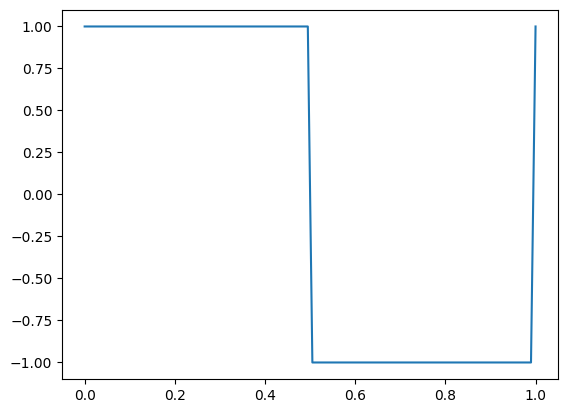

In [5]:
f = 1 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

This is a square wave of 1 Hz frequency. A frequency of `n` Hz means that the pattern you see above repeats `n` times in a second. Let's see that happen in the following exercises

Create a 2 Hz square wave sampled 100 times for 1 second. How many repetitions of the pattern do you see here?

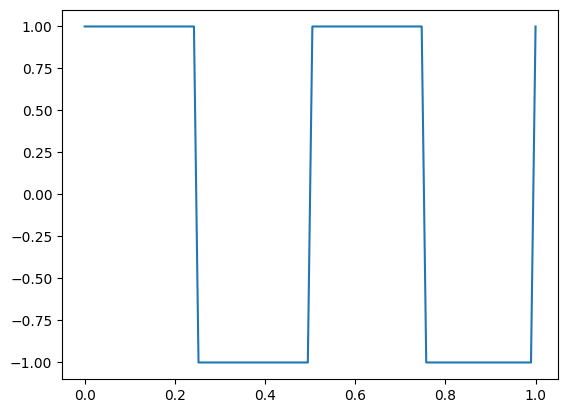

In [6]:
f = 2 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

Create a 10 Hz square wave sampled 100 times for 1 second

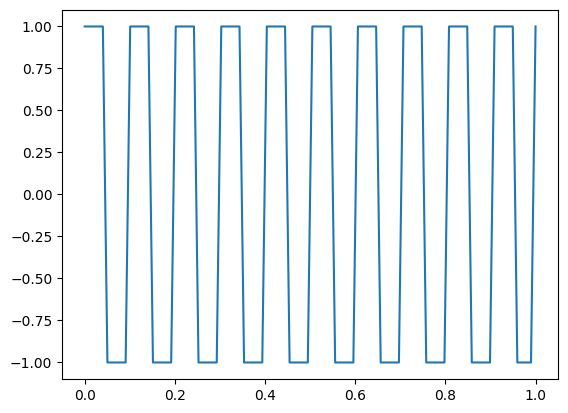

In [7]:
f = 10 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

Create a 0.5 Hz square wave sampled 100 times for 1 second. What do you see?

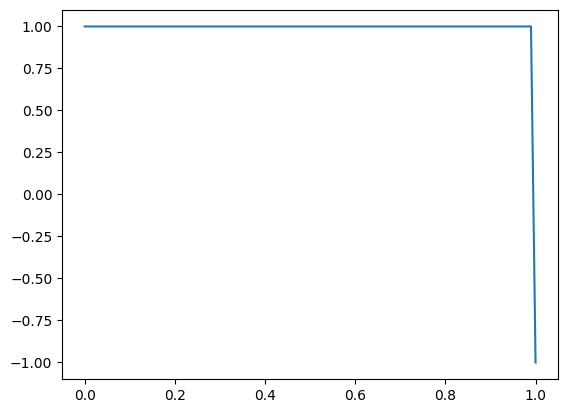

In [8]:
f = 0.5 # Hz
t = np.linspace(0, 1, 100)
w = square(2 * np.pi * f * t)
plt.plot(t, w)

**Example** Create a 1 Hz sawtooth signal sampled 100 times for 1 second. How does this compare with the square signal?

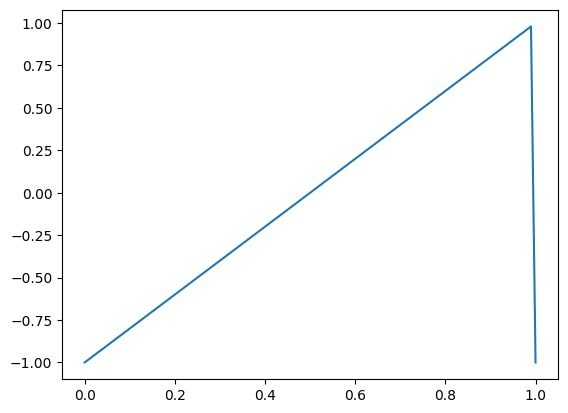

In [9]:
f = 1 # Hz
t = np.linspace(0, 1, 100)
w = sawtooth(2 * np.pi * f * t)
plt.plot(t, w)

Create a 2 Hz sawtooth signal sampled 100 times for 1 second

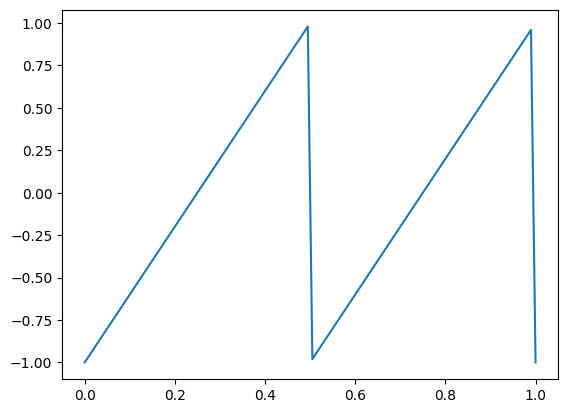

In [10]:
f = 2 # Hz
t = np.linspace(0, 1, 100)
w = sawtooth(2 * np.pi * f * t)
plt.plot(t, w)

Create a 2 Hz sawtooth signal sampled 100 times for 1 second and multiply it by 2. What is the difference between this signal and the previous signal?

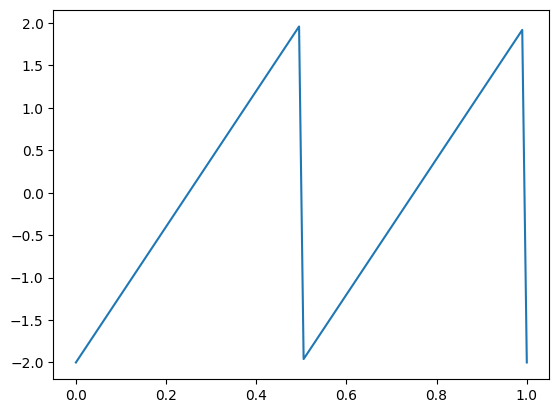

In [11]:
f = 2 # Hz
t = np.linspace(0, 1, 100)
w = 2*sawtooth(2 * np.pi * f * t)
plt.plot(t, w)

What is happens when we sample the signal at same rate as its frequency?

Create a 100 Hz sawtooth signal sampled 100 times for 1 second.  

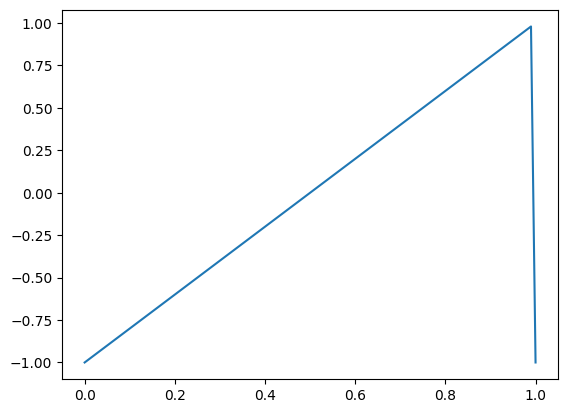

In [12]:
f = 100 # Hz
t = np.linspace(0, 1, 100)
w = sawtooth(2 * np.pi * f * t)
plt.plot(t, w)

Let's talk a bit about the chirp signal

A chirp is a signal in which the frequency increases or decreases over time. In the context of the `scipy.signal.chirp` function, this is implemented by starting the signal at an initial frequency (`f0`) and then changing it to a final frequency (`f1`) over a specified interval of time (`t1`). The rate of this frequency change can follow different methods; when the 'linear' method is used, the frequency changes at a constant rate.

Here is a summarizing table for the different chirp signals discussed:

| Example               | Start Frequency (`f0`) | End Frequency (`f1`) | Time (`t1`) | Frequency Change        | Description                       |
|-----------------------|------------------------|----------------------|-------------|-------------------------|-----------------------------------|
| Constant Frequency    | 5 Hz                   | 5 Hz                 | 10 s        | None (Constant)         | A sine wave with a constant frequency. |
| Increasing Frequency  | 5 Hz                   | 10 Hz                | 10 s        | Linear Increase         | A sine wave that linearly increases in frequency over time. |
| Decreasing Frequency  | 10 Hz                  | 5 Hz                 | 10 s        | Linear Decrease         | A sine wave that linearly decreases in frequency over time. |

In the table:

- "Start Frequency" and "End Frequency" denote the frequencies at the beginning and end of the time interval, respectively.
- "Time" indicates the duration over which the frequency change happens.
- "Frequency Change" shows whether the frequency remains constant or changes linearly with time.
- "Description" provides a brief explanation of the signal's behavior over time.

**Example** Generate constant frequency (1Hz) signal with `chirp`

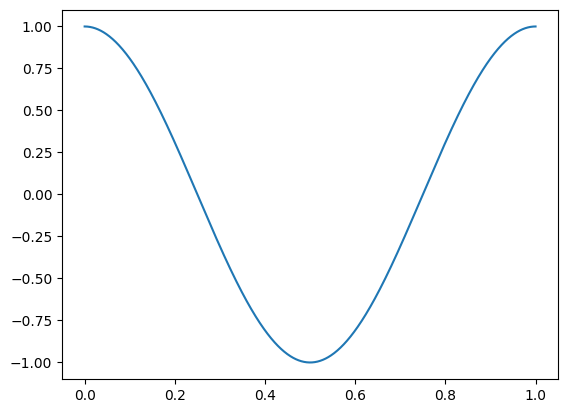

In [13]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=1, f1=1, t1=1)
plt.plot(t, w)

Generate a chirp signal that starts at a frequency of 1 Hz and increases to 10 Hz over a duration of 1 second.

Hint: w = chirp(t, f0=?, t1=?)

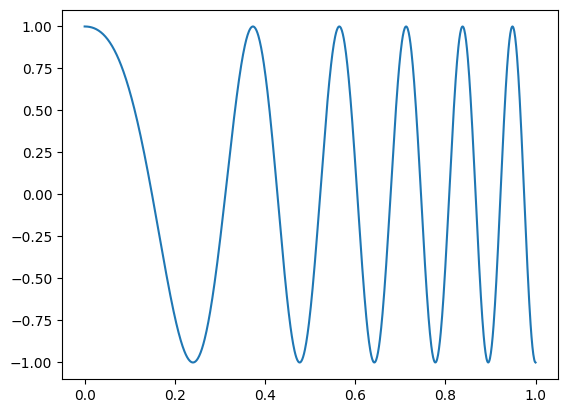

In [14]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=1, f1=10, t1=1)
plt.plot(t, w)

Generate a chirp signal that starts at a frequency of 10 Hz and decreases to 1 Hz over a duration of 1 second.

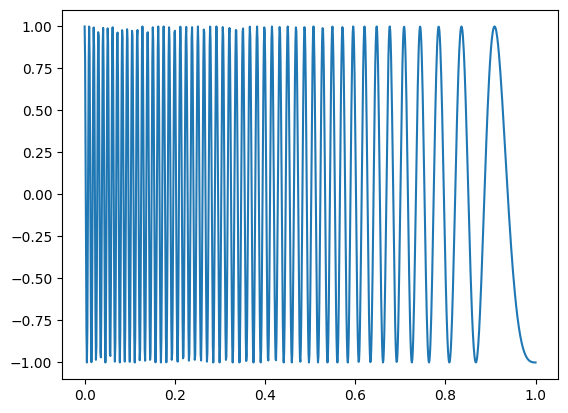

In [15]:
t = np.linspace(0, 1, 1000)
w = chirp(t, f0=100, f1=1, t1=1)
plt.plot(t, w)

**Extra Exploration**: Frequency Modulation Variations

The examples we've worked through have all featured a linear relationship between frequency and time. The `chirp` function, however, is versatile and allows for different types of frequency sweeps.

**Your Mission** *should you choose to accept it!* :

1. Research the scipy.signal.chirp function and identify the parameter that determines the nature of the frequency change over time. List the different options available for this parameter.

2. Modify the provided chirp function code by altering the identified parameter to each available option. Generate and plot the chirp signals for each type of frequency sweep, making sure to label each plot with the type of sweep it represents.

Through this exploration, observe the effects of different frequency modulation methods on the resulting chirp signal.

---

## Create Composite Signals

**Analysis Goals**
In this section, we will learn about 
- periodic signals and how they vary with amplitude and frequency
- composite signals and what they could be composed of

**Learning Goals**
We will make use of matplotlib and how powerful it is in customizing plots


| Code | Description |
| ---- | ----------- |
| `np.linspace(start, stop, n_points)` | Create `n_points` equally spaced values between `start` and `stop`. |
| `plt.plot(x, y)` | Plot `x` on the x-axis and `y` on the y-axis. |
| `plt.xlabel('X-axis')` | Set the x-axis label as 'X-axis'. |
| `plt.ylabel('Y-axis')` | Set the y-axis label as 'Y-axis'. |
| `np.random.randn(n_points)` | Generate `n_points` random values drawn from a standard normal distribution. |

**Example** Create a composite wave from two square waves

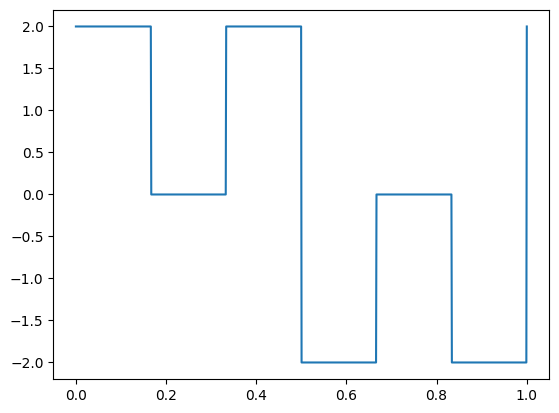

In [16]:
f1 = 1
f2 = 3
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = square(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

Create a composite wave from two sawtooth waves. Play around with different combinations of frequencies in the below cells

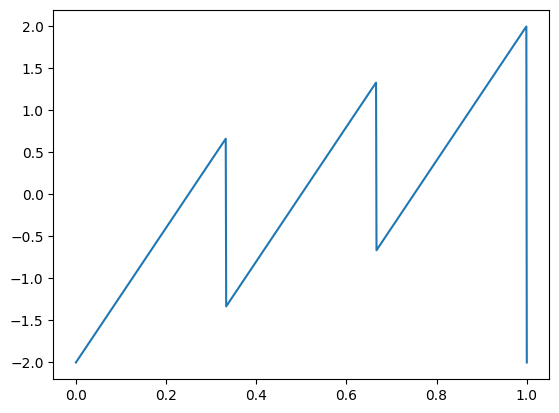

In [17]:
f1 = 1
f2 = 3
t = np.linspace(0, 1, 1000)
w1 = sawtooth(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

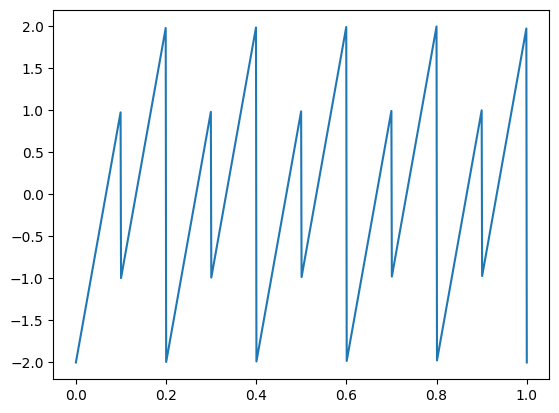

In [18]:
f1 = 5
f2 = 10
t = np.linspace(0, 1, 1000)
w1 = sawtooth(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

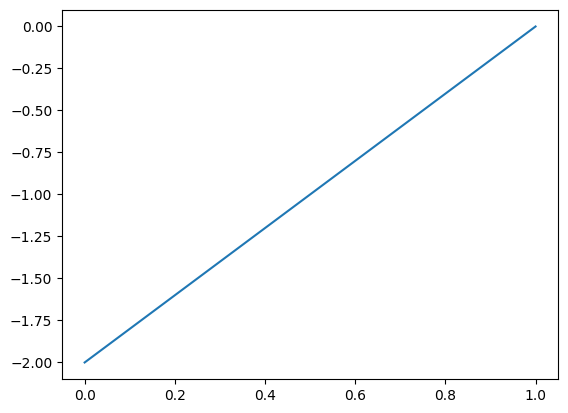

In [19]:
f1 = 0.5
f2 = 0.5
t = np.linspace(0, 1, 1000)
w1 = sawtooth(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

Create composite wave made of sawtooth and a square wave. Play around with it in the below cells

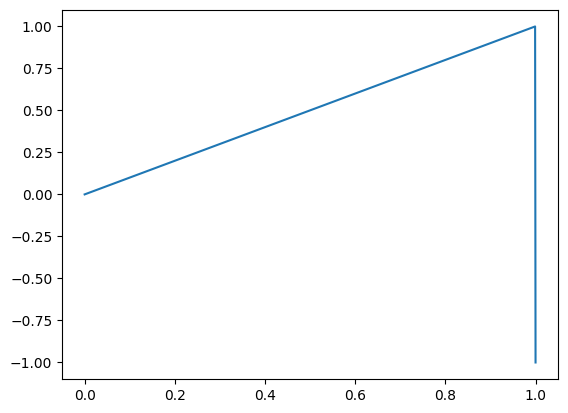

In [20]:
f1 = 0.5
f2 = 0.5
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

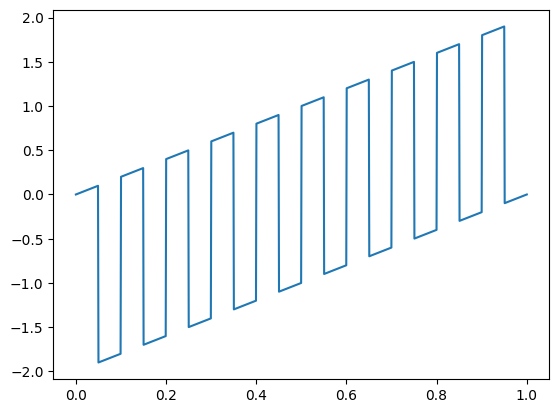

In [21]:
f1 = 10.
f2 = 1.
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

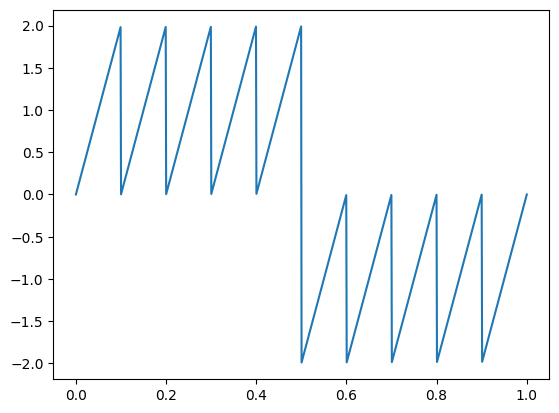

In [22]:
f1 = 1.
f2 = 10.
t = np.linspace(0, 1, 1000)
w1 = square(2 * np.pi * f1 * t)
w2 = sawtooth(2 * np.pi * f2 * t)
plt.plot(t, w1 + w2)

**Example** Create a composite signal made of two chirps and add axis labels and title with legend

Text(0.5, 1.0, 'Composite signal of two chirps')

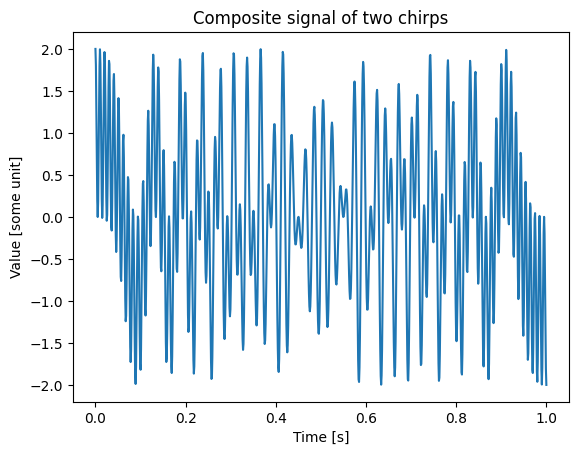

In [23]:
t = np.linspace(0, 1, 1000)
w1 = chirp(t, f0=100, f1=1, t1=1)
w2 = chirp(t, f0=1, f1=100, t1=1)
plt.plot(t, w1+w2, label='Composite signal')
plt.xlabel('Time [s]')
plt.ylabel('Value [some unit]')
plt.title('Composite signal of two chirps')

Play around in the below cells. Create composite signals made of chirp+square, chirp+sawtooth, chirp+chirp+square, etc. Anything you want! Add title, labels etc

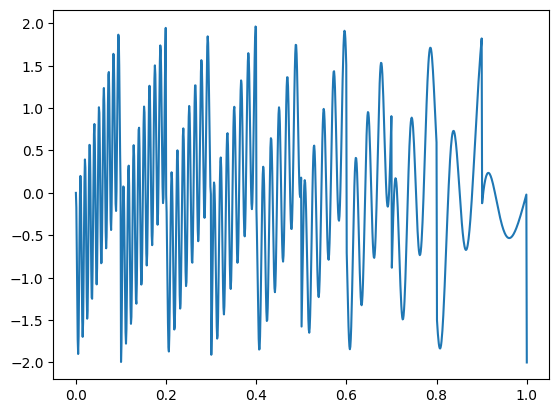

In [24]:
t = np.linspace(0, 1, 1000)
w1 = chirp(t, f0=100, f1=1, t1=1)
w2 = sawtooth(2 * np.pi * 10.0 * t)
plt.plot(t, w1 + w2)

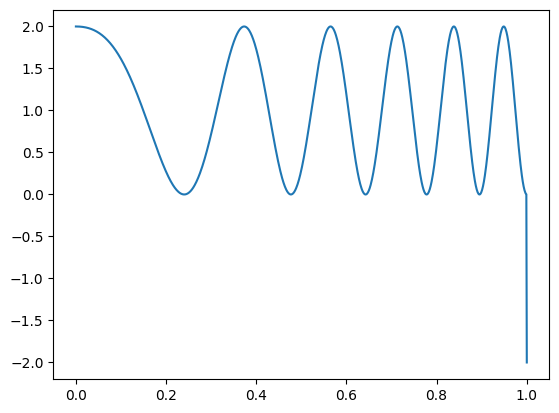

In [25]:
t = np.linspace(0, 1, 1000)
w1 = chirp(t, f0=1, f1=10, t1=1)
w2 = square(2 * np.pi * 0.5 * t)
plt.plot(t, w1 + w2)

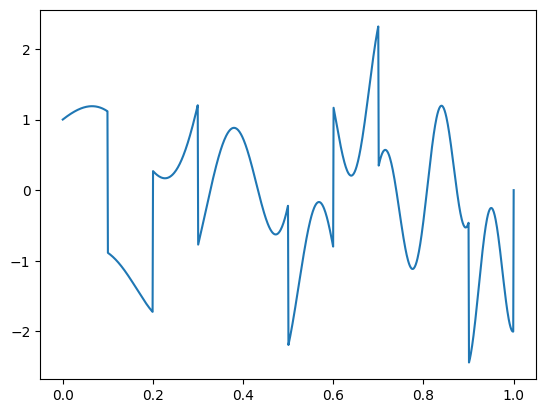

In [26]:
t = np.linspace(0, 1, 1000)
w1 = chirp(t, f0=1, f1=10, t1=1)
w2 = square(2 * np.pi * 5 * t)
w3 = sawtooth(2 * np.pi * 2.5 * t)
plt.plot(t, w1 + w2 + w3)

---

## Frequency Analysis

**Analysis Goals**

In this section, we will learn how to identify frequencies of oscillation of a composite signal

Most of the signals we observe or measure is a composite signal composed of more than frequency. Frequency analysis is an important tool in breaking down a composite signal into its constituent frequencies. The way to do frequency analysis of a time series data (in this case, a signal measured over a period of time) is by first transforming it into frequency space which can be done in four steps. 
1. Perform a Fourier Transform on the signal 
2. Calculate the frequencies corresponding to the FFT result 
3. Since the FFT result is symmetric, filter out the negative frequencies. 
4. Calculate the magnitude of the FFT result for positive frequencies and scale the result by a factor of 2.0/len(alpha). 

**Learning Goals**

- `scipy.fft` and `scipy.fftfreq` for frequency analysis
- Pandas sort_values() to identify frequency of oscillation


Here's a markdown table with explanations for the provided code snippets:

| Code                                    | Description                                            |
| --------------------------------------- | ------------------------------------------------------ |
| `fft(some_signal)`                     | Step 1: Compute the Fast Fourier Transform of `some_signal`. This transforms the signal from the time domain to the frequency domain. |
| `fftfreq(len(some_signal), d=sampling_time)` | Step 2: Calculate the frequencies corresponding to the FFT result. `len(some_signal)` is the number of data points, and `sampling_time` is the time interval between samples. |
| `fft_freqs[fft_freqs > 0]`             | Step 3: Select only the positive frequencies from the `fft_freqs` array. This step filters out the negative frequencies. |
| `2.0/len(some_signal) * np.abs(fft_result[fft_freqs > 0])` | Step 4: Calculate the magnitude of the FFT result for positive frequencies. The factor `2.0/len(some_signal)` scales the result appropriately. |
| `pd.DataFrame({'x': list_of_x_values, 'y': list_of_y_values})` | Create a Pandas DataFrame with 'x' and 'y' columns filled with values. |
| `df.sort_values(by='column1', ascending=False)` | Sort the DataFrame `df` in descending order of `column1`. |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.subplot(nrows, ncols, nindex)` | `plt.subplot(211)` tells Python to create a grid of subplots with 2 rows and 1 column and to use the first subplot (top plot) for the current plotting commands. If you were to add another plotting command with plt.subplot(212), it would plot in the second subplot (bottom plot). |


**Example** Create a constant frequency chirp signal frequency 10.0 V measured 250 times between 0.01 s and 2.5 s and compute amplitude spectrum. Plot both using subplots

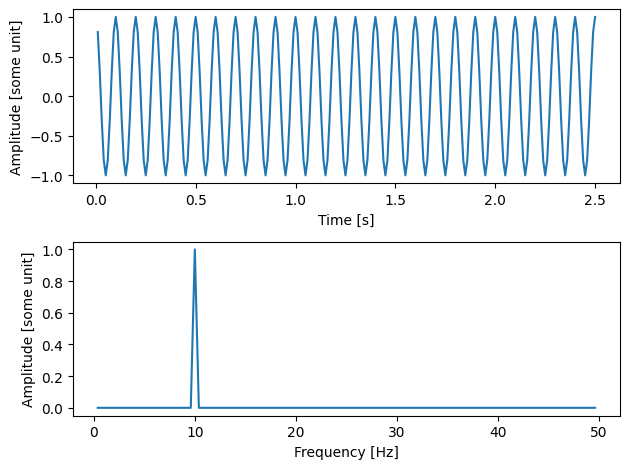

In [27]:
t = np.linspace(0.01, 2.5, 250)
w = chirp(t, f0=10, f1=10, t1=2.5)


## You just have to use the four lines for frequency analysis
fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = 2.0/len(w) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the power and scale it by a factor of 2.0/len(signal)
## Ends here

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [some unit]')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [some unit]')

plt.tight_layout()

We generated a signal of 10 Hz frequency and we see a peak at 10 Hz in frequency domain!

Generate a chirp signal that begins with frequency of 10 Hz and increases to 20 Hz over a period of 2.5 seconds and compute amplitude spectrum. Plot the signal and amplitude spectrum


`t = np.linspace(0.01, 2.5, 250)`

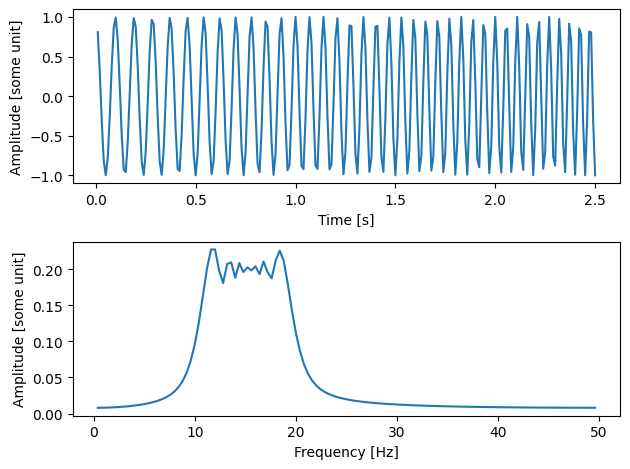

In [28]:
t = np.linspace(0.01, 2.5, 250)
w = chirp(t, f0=10, f1=20, t1=2.5)

fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = 2.0/len(w) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the power and scale it by a factor of 2.0/len(signal)

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [some unit]')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [some unit]')

plt.tight_layout()

 Since this is a chirp signal, we would expect to see a distribution of energy across a range of frequencies from 10 Hz up to 20 Hz. The plot would likely show a peak that starts at 10 Hz and extends or spreads toward 20 Hz

Generates a chirp signal that begins with frequency of 10 Hz and increases to 20 Hz over a period of 2.5 seconds and compute amplitude spectrum. Before you run the code, predict how the figure would look like

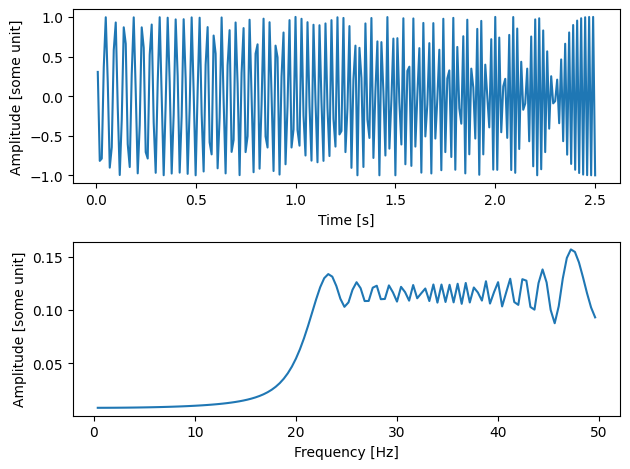

In [29]:
t = np.linspace(0.01, 2.5, 250)
w = chirp(t, f0=20, f1=50, t1=2.5)

fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = 2.0/len(w) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the power and scale it by a factor of 2.0/len(signal)

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [some unit]')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [some unit]')

plt.tight_layout()

Create two constant frequency signals w1 and w2 at 10 Hz and 25 Hz respectively, which are then summed together to form a composite signal w. What can you interpret from this?

Use `t = np.linspace(0.01, 2.5, 250)`

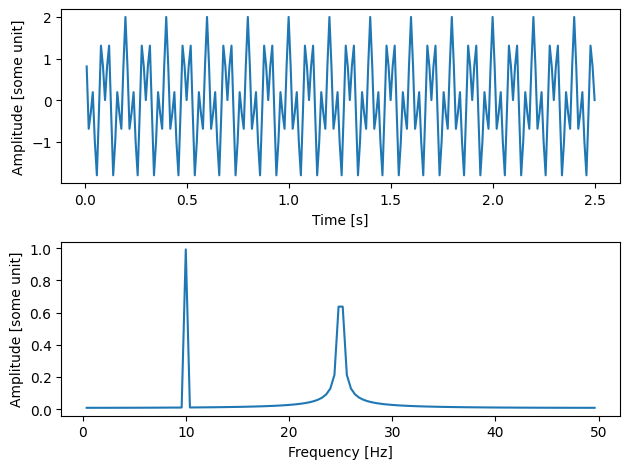

In [30]:
t = np.linspace(0.01, 2.5, 250)
w1 = chirp(t, f0=10, f1=10, t1=2.5)
w2 = chirp(t, f0=25, f1=25, t1=2.5)
w = w1 + w2

fft_result = fft(w) # transform to frequency domain
fft_freqs = fftfreq(len(w), d=(t[1] - t[0])) # get all frequencies that can be measured with the data we have
positive_freqs = fft_freqs[fft_freqs > 0] # take only positive frequencies
positive_fft_result = 2.0/len(w) * np.abs(fft_result[fft_freqs > 0]) # take absolute of the power and scale it by a factor of 2.0/len(signal)

plt.subplot(2, 1, 1)
plt.plot(t, w)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [some unit]')

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [some unit]')

plt.tight_layout()

You see two peaks here: One at 10 Hz representing w1 and one at 25 Hz representing w2. Even though w is a composite signal, frequency space can still separate them out

Extra: Compute power spectrum of composite signals made of square+sawtooth, chirp+sawtooth, etc! Anything you would like to!

---

You can see a peak at around 10 Hz which represents the frequency of the signal we created

## Power Spectrum Of Real Data

**Analysis Goals**
Now that we are familiar with the theory of power spectrum and frequency analysis, we shall start working with real data. In this section, we will
- Plot and compare power spectrum of trial-LFP data of different brain areas
- Plot and compare power spectrum of trial-avereaged LFP data of different brain areas 


**Learning Goals**
- Using Pandas columns with custom functions
- Pandas groupby


| Code                                          | Description                                                                |
| --------------------------------------------- | -------------------------------------------------------------------------- |
| `dset = xr.load_dataset('data/steinmetz_20117-12-06_Lederberg.nc')` | Load the dataset from the file 'steinmetz_20117-12-06_Lederberg.nc' using xarray (assuming "xr" is the xarray module). |
| `dset['column'].to_dataframe().reset_index()` | Extract the 'column' data from the xarray dataset, convert it to a Pandas DataFrame, and reset the index. |
| `df[(df['col1'] == val1) & (df['col2'] == val2)]` | Filter rows from the DataFrame 'df' where 'col1' values equal 'val1' and 'col2' values equal 'val2'. |
| `df['col1'].values` | Extract the values from 'col1' in the DataFrame 'df' without indices, returning them as a NumPy array. |
| `plt.plot(x, y)` | Plot values in the 'y' array against the corresponding 'x' values. |

In [31]:
dset = xr.load_dataset('data/steinmetz_2017-12-06_Lederberg.nc')

Make lfp dataframe from dset and reset index

In [32]:
lfp = dset['lfp'].to_dataframe().reset_index()

**Example** Create power spectrum of LFP measurements from trail 1 of VISam brain area. What does it say?


We will use compute_power_spectrum(time, signal) which takes in the time and lfp values to create power spectrum in a single line! This is to reduce number of lines you will have to write

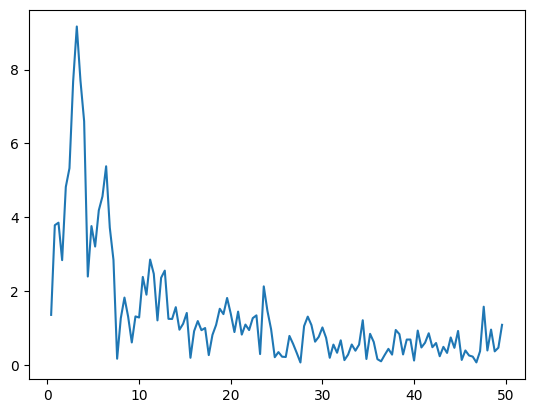

In [33]:
df = lfp[(lfp['brain_area_lfp'] == 'VISam') & (lfp['trial'] == 1)]
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Create power spectrum of LFP measurements from trail 5 of VISam brain area. How does this compare with the previous figure?

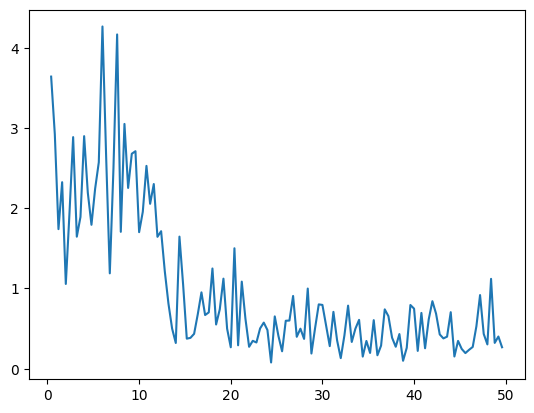

In [34]:
df = lfp[(lfp['brain_area_lfp'] == 'VISam') & (lfp['trial'] == 5)]
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Create power spectrum of LFP measurements from trail 1 of ACA brain area. How does this compare with the previous figure?

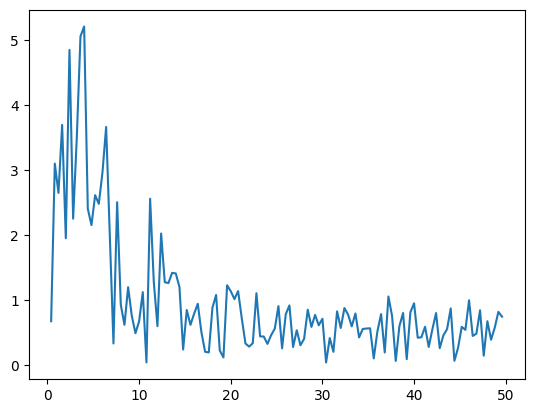

In [35]:
df = lfp[(lfp['brain_area_lfp'] == 'ACA') & (lfp['trial'] == 1)]
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

**Example** Compute power spectrum of mean LFP in VISam by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

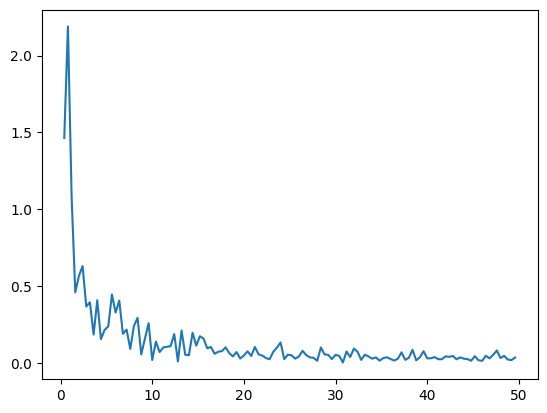

In [36]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'VISam']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Compute power spectrum of mean LFP in ZI by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

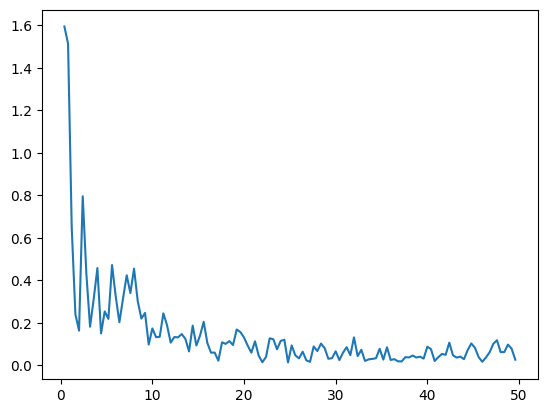

In [37]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'ZI']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Compute power spectrum of mean LFP in ACA by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

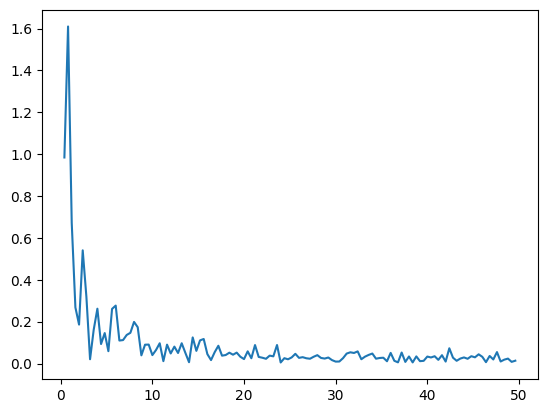

In [38]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'ACA']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Compute power spectrum of mean LFP in LGd by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

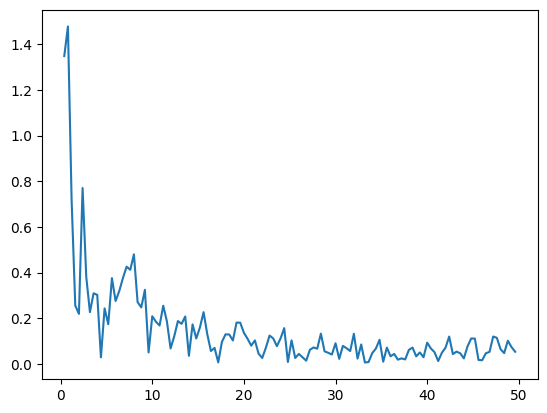

In [39]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'LGd']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Pick 5 more trials and brain areas that you want to explore and create power spectrum